In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import time
from copy import deepcopy

# Gerando Grafo

'''
grafo = nx.Graph()

grafo.add_nodes_from("ABCDEFGHIUV")

grafo.add_weighted_edges_from([('A', 'B', 1), ('B', 'C', 1), ('C', 'D', 1), ('D', 'F', 1), ('E', 'F', 1), ('A', 'I', 1),
                               ('C', 'U', 1), ('U', 'V', 1), ('V', 'E', 1), ('V', 'I', 1), ('I', 'H', 1), ('F', 'H', 1),
                               ('F', 'G', 1), ('H', 'G', 1)])
'''

#grafo = nx.gnm_random_graph(15, 30)

grafo1 = nx.grid_2d_graph(10, 10)
grafo2 = nx.grid_2d_graph(10, 15)
grafo3 = nx.grid_2d_graph(10, 20)
grafo4 = nx.grid_2d_graph(10, 3)
grafo5 = nx.grid_2d_graph(10, 5)
grafo6 = nx.grid_2d_graph(10, 18)

for (u, v) in grafo1.edges:
    grafo1.edges[u,v]['weight'] = random.randint(20,50)

for (u, v) in grafo2.edges:
    grafo2.edges[u,v]['weight'] = random.randint(20,50)

for (u, v) in grafo3.edges:
    grafo3.edges[u,v]['weight'] = random.randint(20,50)

for (u, v) in grafo4.edges:
    grafo4.edges[u,v]['weight'] = random.randint(20,50)
    
for (u, v) in grafo5.edges:
    grafo5.edges[u,v]['weight'] = random.randint(20,50)
    
for (u, v) in grafo6.edges:
    grafo6.edges[u,v]['weight'] = random.randint(20,50)

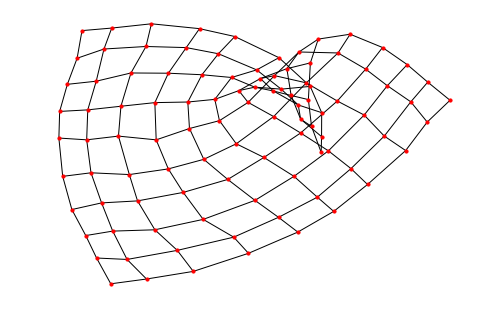

In [17]:
#Grafo 1
pos = nx.spring_layout(grafo1)
nx.draw(grafo1, pos, node_size=10, with_labels = False)
plt.show()

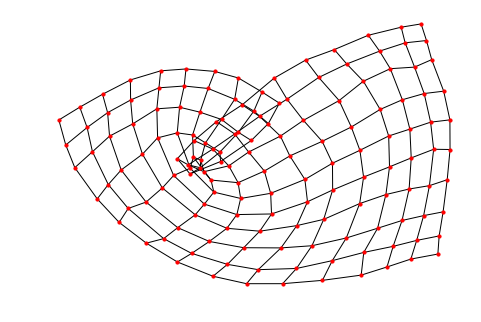

In [18]:
#Grafo 2
pos = nx.spring_layout(grafo2)
nx.draw(grafo2, pos, node_size=10, with_labels = False)
plt.show()

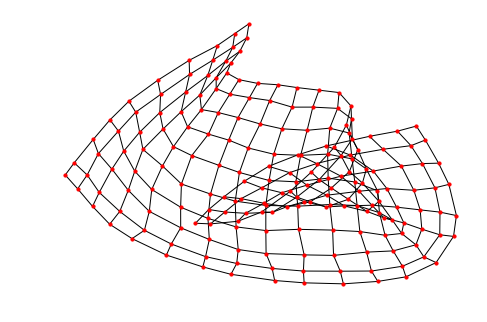

In [19]:
#Grafo 3
pos = nx.spring_layout(grafo3)
nx.draw(grafo3, pos, node_size=10, with_labels = False)
plt.show()

In [42]:
def isCicloDominante(grafo, ciclo, k):
    sg = grafo.subgraph(ciclo)
    allEdges = list(grafo.edges)
    dominatingEdges = []
    dominante = True
    
    #Verifica se e um ciclo.
    aux = [] #Variavel de verificação de vertice repetido.
    for i in range(len(ciclo) - 1):
        if ciclo[i] in aux:
            return False
        if not ciclo[i] in grafo.neighbors(ciclo[i+1]):
            return False
        aux.append(ciclo[i])
    if not ciclo[-1] in grafo.neighbors(ciclo[0]):
        return False
    if ciclo[-1] in aux:
        return False

    for sgEdge in sg.edges:
        dominatingEdges.append(sgEdge)

    for sgEdge in sg.edges:
        for edge in allEdges:  # edge[0] = i e edge[1] = j | sgEdge[0] = u e sgEdge[1] = v
            invertido = (edge[1], edge[0])
            if nx.shortest_path_length(grafo, edge[0], sgEdge[0]) and nx.shortest_path_length(grafo, edge[1],
                                                                                              sgEdge[0]) <= k:
                if edge not in dominatingEdges and invertido not in dominatingEdges:
                    dominatingEdges.append(edge)
            elif nx.shortest_path_length(grafo, edge[0], sgEdge[1]) and nx.shortest_path_length(grafo, edge[1],
                                                                                                sgEdge[1]) <= k:
                if edge not in dominatingEdges and invertido not in dominatingEdges:
                    dominatingEdges.append(edge)
            elif nx.shortest_path_length(grafo, edge[0], sgEdge[1]) and nx.shortest_path_length(grafo, edge[1],
                                                                                                sgEdge[0]) <= k:
                if edge not in dominatingEdges and invertido not in dominatingEdges:
                    dominatingEdges.append(edge)
            elif nx.shortest_path_length(grafo, edge[0], sgEdge[0]) and nx.shortest_path_length(grafo, edge[1],
                                                                                                sgEdge[1]) <= k:
                if edge not in dominatingEdges and invertido not in dominatingEdges:
                    dominatingEdges.append(edge)

    for i in allEdges:
        inverso = (i[1], i[0])
        if i not in dominatingEdges and inverso not in dominatingEdges:
            dominante = False

    return dominante


def custoCaminho(grafo, ciclo):
    subgrafo = grafo.subgraph(ciclo)
    custo = sum(grafo[u][v]['weight'] for (u, v) in subgrafo.edges)
    return custo

def melhorSolucaoPopulacao(grafo, populacao):
    melhorSolucao = populacao[0]
    for i in range(1, len(populacao)):
        if custoCaminho(grafo, populacao[i]) < custoCaminho(grafo, melhorSolucao):
            melhorSolucao = populacao[i]
    
    return melhorSolucao
    

def geraPopulacaoInicial(grafo, k, tamPopulacao):
  
    verticesEscolhidos = set()
    listaCiclos = []
    lista = []
    listaCiclosDominante = []
    
    while len(listaCiclosDominante) < tamPopulacao:
    
        v = random.choice(list(grafo.nodes))
        while v in verticesEscolhidos:
            v = random.choice(list(grafo.nodes))
        
        verticesEscolhidos.add(v)
        
        indice = 0        
        aux = nx.cycle_basis(grafo, v)
        #Retirando possiveis repeticoes de ciclos
        sets = [set(x) for x in aux]
        for i in sets:
            if i not in lista:
                lista.append(i)
                listaCiclos.append(aux[indice])
            indice += 1
        
        for ciclo in listaCiclos:
            if len(listaCiclosDominante) < tamPopulacao:
                if isCicloDominante(grafo, ciclo, k):
                    listaCiclosDominante.append(ciclo)
    
    return listaCiclosDominante


# Selecao

def selecao(grafo, listaCiclosDominantes, tam_torneio):
    torneio = random.sample(listaCiclosDominantes, tam_torneio)
    listaCustos = []
    pais = []
    for ciclo in torneio:
        listaCustos.append(custoCaminho(grafo, ciclo))

    for i in range(2):
        pais.append(torneio[listaCustos.index(min(listaCustos))])
        del(torneio[listaCustos.index(min(listaCustos))])
        del(listaCustos[listaCustos.index(min(listaCustos))])

    return pais

# Crossover

def crossoverC1(pais):
    corte = random.randint(0, len(pais[0]) - 1)
    #print("Corte realizado na posição {} do primeiro pai. ".format(corte))
    filho = pais[0][0:corte + 1] + pais[1][corte + 1:len(pais[1]) + 1]
    return filho


def crossoverPMX(pais):
    if (len(pais[0]) < len(pais[1])):
        inicioJanela = random.randint(1, int(len(pais[0]) / 2))
        fimJanela = random.randint(int(len(pais[0]) / 2) + 1, len(pais[0]) - 1)
    else:
        inicioJanela = random.randint(0, int(len(pais[1]) / 2))
        fimJanela = random.randint(int(len(pais[1]) / 2) + 1, len(pais[1]) - 1)
    
    #print("Inicio janela: {}".format(inicioJanela))
    #print("Fim janela: {}".format(fimJanela))
    
    janelaP1 = pais[0][inicioJanela:fimJanela + 1]
    janelaP2 = pais[1][inicioJanela:fimJanela + 1]

    pais[0][inicioJanela:fimJanela + 1] = janelaP2
    pais[1][inicioJanela:fimJanela + 1] = janelaP1
    
    mapeamentos = []
    
    mapeado = False
    
    for i in range(len(janelaP1)):
        for m in mapeamentos:
            if janelaP1[i] in m:
                m.add(janelaP1[i])
                m.add(janelaP2[i])
                mapeado = True
            if janelaP2[i] in m:
                m.add(janelaP2[i])
                m.add(janelaP1[i])
                mapeado = True
        if not mapeado:
            mapeamentos.append(set([janelaP1[i],janelaP2[i]]))
        
        mapeado = False            
    
    for i in range(len(pais[0])):
        for j in range(len(pais[1])):
            if (i < inicioJanela or i > fimJanela) and (j < inicioJanela or j > fimJanela):
                if pais[0][i] != pais[1][j]:
                    for m in mapeamentos:
                        if pais[0][i] in m and pais[1][j] in m:
                            aux = pais[0][i]
                            pais[0][i] = pais[1][j]
                            pais[1][j] = aux
    
    #print("Mapeamentos:")
    #print(mapeamentos)
    return pais

# Mutacao

def mutacaoSwapRange(f1):

    ok = True
    while (ok):
        corte_gene1 = random.randint(0, len(f1) - 1)
        corte_gene2 = random.randint(0, len(f1) - 1)
        if (corte_gene1 != corte_gene2 and corte_gene1 < corte_gene2):
            ok = False

    while (corte_gene1 < corte_gene2):
        aux = f1[corte_gene1]
        f1[corte_gene1] = f1[corte_gene2]
        f1[corte_gene2] = aux
        corte_gene1 = corte_gene1 + 1
        corte_gene2 = corte_gene2 - 1

    #print(f1)
    return(f1)

def mutacaoInvertRange(cromossomo_ciclo):
    
    inicioJanela = random.randint(0, int(len(cromossomo_ciclo) / 2))
    fimJanela = random.randint(inicioJanela + 1, len(cromossomo_ciclo))
    
    #print(inicioJanela)
    #print(fimJanela)
    
    for i in range(inicioJanela, fimJanela - 2):
        aux = cromossomo_ciclo[i]
        cromossomo_ciclo[i] = cromossomo_ciclo[i+1]
        cromossomo_ciclo[i+1] = aux
        i += 1
        
    if math.fabs(inicioJanela - fimJanela) == 1:
        aux = cromossomo_ciclo[inicioJanela]
        cromossomo_ciclo[inicioJanela] = cromossomo_ciclo[fimJanela]
        cromossomo_ciclo[fimJanela] = aux
    
    if math.fabs(inicioJanela - fimJanela) % 2 != 0 and fimJanela == len(cromossomo_ciclo):
        aux = cromossomo_ciclo[0]
        cromossomo_ciclo[0] = cromossomo_ciclo[-1]
        cromossomo_ciclo[-1] = aux
    
    return cromossomo_ciclo

# Algoritmo Genetico
def algoritmoGenetico(grafo, k, tamPopulacao, limiteIteracao):
    cromossomos = geraPopulacaoInicial(grafo, k, tamPopulacao)
    melhorSolucao = cromossomos[0]
    filhos = []
    iSemMelhora = 0
    while iSemMelhora < limiteIteracao:
        while len(filhos) < tamPopulacao:
            cromossomosPais = deepcopy(selecao(grafo, cromossomos, 4))
            escolhasCrossover = [1, 2]
            probabilidadesCrossover = [0.50, 0.50]
            rnd = np.random.choice(escolhasCrossover, p=probabilidadesCrossover)
            if rnd == 1: 
                cromossomoFilho = crossoverC1(cromossomosPais)
            elif rnd == 2:
                cromossomoFilho = random.choice(crossoverPMX(cromossomosPais))

            escolhasMutacao = [1, 2, 3]
            probabilidadesMutacao = [0.03, 0.07, 0.90]
            rnd = np.random.choice(escolhasMutacao, p=probabilidadesMutacao)
            if rnd == 1: 
                mutacaoSwapRange(cromossomoFilho)
                #print("Mutação Swap Range!")
            elif rnd == 2:
                mutacaoInvertRange(cromossomoFilho)
                #print("Mutação Invert Range!")
            
            if isCicloDominante(grafo, cromossomoFilho, k):
                filhos.append(cromossomoFilho)
    
        cromossomos = deepcopy(filhos)
        filhos = []
        melhorSolucaoAtual = melhorSolucaoPopulacao(grafo, cromossomos)
        filhos.append(melhorSolucaoAtual) #Elitismo
        if set(melhorSolucaoAtual) == set(melhorSolucao):
            iSemMelhora += 1
        
        if custoCaminho(grafo, melhorSolucaoAtual) < custoCaminho(grafo, melhorSolucao):
            melhorSolucao = melhorSolucaoAtual
    
    return melhorSolucao

def darp(grafo, kDominancia, nMaxIteracaoSemMelhora = 5):
    tamPopulacao = int(0.25 * len(grafo.nodes))
    #print("Tamanho da Populacao: {}".format(tamPopulacao))
    tInicio = time.time()
    solucao = algoritmoGenetico(grafo, kDominancia, tamPopulacao, nMaxIteracaoSemMelhora)
    tFim = time.time()
    #print("Melhor Solucao:")
    #print(solucao)
    tempoTotal = tFim - tInicio
    custoSolucao = custoCaminho(grafo, solucao)
    
    return (tempoTotal, custoSolucao)

In [39]:
darp(grafo1, 80)

Tamanho da Populacao: 25
Melhor Solucao:
[(3, 8), (3, 9), (4, 9), (4, 8)]


(16.909954071044922, 124)

In [29]:
#Teste G100_K50
tempoCustoT1 = []
for i in range(20):
    tempoCustoT1.append(darp(grafo1, 50))
    print("{}\t{}\t{}\t{}".format(len(grafo1.nodes),len(grafo1.edges),tempoCustoT1[-1][1],tempoCustoT1[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT1:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT1)
custoMedio /= len(tempoCustoT1)

print("{}\t{}".format(custoMedio,tempoMedio))

100	180	102	19.567091464996338
100	180	102	18.657232999801636
100	180	102	16.99853539466858
100	180	124	17.033375024795532
100	180	102	17.057738542556763
100	180	102	18.690646171569824
100	180	102	19.26447892189026
100	180	124	18.251831531524658
100	180	107	17.81257939338684
100	180	102	18.389485836029053
100	180	102	18.233375310897827
100	180	102	19.19710087776184
100	180	102	22.60867977142334
100	180	102	18.90575933456421
100	180	102	19.39474606513977
100	180	102	18.609420776367188
100	180	102	20.406532049179077
100	180	102	19.997220516204834
100	180	102	17.87896704673767
100	180	102	19.71775245666504
104.45	18.833627474308013


In [30]:
#Teste G100_K60
tempoCustoT2 = []
for i in range(20):
    tempoCustoT2.append(darp(grafo1, 60))
    print("{}\t{}\t{}\t{}".format(len(grafo1.nodes),len(grafo1.edges),tempoCustoT2[-1][1],tempoCustoT2[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT2:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT2)
custoMedio /= len(tempoCustoT2)

print("{}\t{}".format(custoMedio,tempoMedio))

100	180	107	21.480889797210693
100	180	107	20.887727975845337
100	180	102	23.146615266799927
100	180	102	22.26286482810974
100	180	102	19.925535440444946
100	180	102	22.18501615524292
100	180	102	19.42434811592102
100	180	124	17.717469692230225
100	180	102	18.55327343940735
100	180	102	18.261607885360718
100	180	102	16.841384887695312
100	180	121	18.84943175315857
100	180	102	19.267913818359375
100	180	102	19.76536536216736
100	180	124	17.805609464645386
100	180	116	18.80841588973999
100	180	107	18.796327590942383
100	180	116	18.869457006454468
100	180	102	18.881489276885986
100	180	116	19.305301189422607
108.0	19.551802241802214


In [31]:
#Teste G150_K50
tempoCustoT3 = []
for i in range(20):
    tempoCustoT3.append(darp(grafo2, 50))
    print("{}\t{}\t{}\t{}".format(len(grafo2.nodes),len(grafo2.edges),tempoCustoT3[-1][1],tempoCustoT3[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT3:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT3)
custoMedio /= len(tempoCustoT3)

print("{}\t{}".format(custoMedio,tempoMedio))

150	275	136	69.98200678825378
150	275	136	74.29390215873718
150	275	101	70.10585331916809
150	275	101	76.73821711540222
150	275	101	76.88097310066223
150	275	101	66.99081897735596
150	275	101	54.664812326431274
150	275	101	58.763797998428345
150	275	101	52.76181507110596
150	275	122	50.74221920967102
150	275	101	58.02868843078613
150	275	101	60.09319496154785
150	275	101	59.22552037239075
150	275	101	60.709547996520996
150	275	101	58.178321838378906
150	275	101	52.61823773384094
150	275	136	53.57460427284241
150	275	101	58.90541315078735
150	275	128	59.03898215293884
150	275	101	53.0650417804718
108.65	61.2680984377861


In [32]:
#Teste G150_K60
tempoCustoT4 = []
for i in range(20):
    tempoCustoT4.append(darp(grafo2, 60))
    print("{}\t{}\t{}\t{}".format(len(grafo2.nodes),len(grafo2.edges),tempoCustoT4[-1][1],tempoCustoT4[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT4:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT4)
custoMedio /= len(tempoCustoT4)

print("{}\t{}".format(custoMedio,tempoMedio))

150	275	128	58.218077182769775
150	275	142	59.047993898391724
150	275	101	58.09853434562683
150	275	142	60.11424112319946
150	275	101	59.13989233970642
150	275	101	51.77840995788574
150	275	122	53.305439472198486
150	275	109	49.22727346420288
150	275	101	51.84526824951172
150	275	122	53.16569781303406
150	275	136	54.208977937698364
150	275	136	52.80770516395569
150	275	134	52.314014196395874
150	275	122	50.77720546722412
150	275	136	58.48954701423645
150	275	136	55.50947046279907
150	275	101	58.627117395401
150	275	101	53.4769389629364
150	275	136	62.09085273742676
150	275	101	51.78439402580261
120.4	55.20135256052017


In [34]:
#Teste G200_K50
tempoCustoT5 = []
for i in range(20):
    tempoCustoT5.append(darp(grafo3, 50))
    print("{}\t{}\t{}\t{}".format(len(grafo3.nodes),len(grafo3.edges),tempoCustoT5[-1][1],tempoCustoT5[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT5:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT5)
custoMedio /= len(tempoCustoT5)

print("{}\t{}".format(custoMedio,tempoMedio))

200	370	113	165.57978129386902
200	370	102	150.65183806419373
200	370	128	169.7038927078247
200	370	102	166.30110502243042
200	370	102	164.79406642913818
200	370	124	195.60159707069397
200	370	114	168.80326437950134
200	370	102	143.09518194198608
200	370	102	172.0615427494049
200	370	128	168.04337668418884
200	370	124	165.92300963401794
200	370	102	141.41159582138062
200	370	102	142.50866794586182
200	370	102	171.66464185714722
200	370	102	175.12538766860962
200	370	102	149.11997079849243
200	370	122	165.98979425430298
200	370	128	168.75244045257568
200	370	101	143.299546957016
200	370	102	171.71554732322693
110.2	163.00731245279312


In [35]:
#Teste G200_K60
tempoCustoT6 = []
for i in range(20):
    tempoCustoT6.append(darp(grafo3, 60))
    print("{}\t{}\t{}\t{}".format(len(grafo3.nodes),len(grafo3.edges),tempoCustoT6[-1][1],tempoCustoT6[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT6:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT6)
custoMedio /= len(tempoCustoT6)

print("{}\t{}".format(custoMedio,tempoMedio))

200	370	128	172.66634607315063
200	370	102	155.29314613342285
200	370	113	155.45797777175903
200	370	101	149.83808636665344
200	370	102	174.14401531219482
200	370	102	139.5694887638092
200	370	102	138.50260829925537
200	370	128	164.35616660118103
200	370	102	166.33893585205078
200	370	113	160.16437888145447
200	370	128	171.9289779663086
200	370	124	166.59716844558716
200	370	124	190.78210425376892
200	370	102	138.0774917602539
200	370	102	166.58520126342773
200	370	114	170.83988976478577
200	370	128	176.4708366394043
200	370	128	162.98195886611938
200	370	128	162.95696449279785
200	370	114	152.55472779273987
114.25	161.80532356500626


In [47]:
#Teste G30_K50
tempoCustoT7 = []
for i in range(20):
    tempoCustoT7.append(darp(grafo4, 50))
    print("{}\t{}\t{}\t{}".format(len(grafo4.nodes),len(grafo4.edges),tempoCustoT7[-1][1],tempoCustoT7[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT7:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT7)
custoMedio /= len(tempoCustoT7)

print("{}\t{}".format(custoMedio,tempoMedio))

30	47	129	0.25235652923583984
30	47	124	0.3700282573699951
30	47	115	0.3181302547454834
30	47	125	0.25032854080200195
30	47	104	0.24630451202392578
30	47	125	0.2743191719055176
30	47	129	0.25330471992492676
30	47	104	0.2542836666107178
30	47	124	0.33610081672668457
30	47	104	0.23536968231201172
30	47	124	0.3201792240142822
30	47	96	0.23538756370544434
30	47	110	0.2593071460723877
30	47	104	0.23531627655029297
30	47	96	0.22045350074768066
30	47	115	0.2792093753814697
30	47	104	0.24837470054626465
30	47	104	0.24236488342285156
30	47	125	0.2682685852050781
30	47	96	0.23832297325134277
112.85	0.26688551902770996


In [52]:
#Teste G30_K60
tempoCustoT8 = []
for i in range(20):
    tempoCustoT8.append(darp(grafo4, 60))
    print("{}\t{}\t{}\t{}".format(len(grafo4.nodes),len(grafo4.edges),tempoCustoT8[-1][1],tempoCustoT8[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT8:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT8)
custoMedio /= len(tempoCustoT8)

print("{}\t{}".format(custoMedio,tempoMedio))

30	47	96	0.2643246650695801
30	47	96	0.2712390422821045
30	47	96	0.24634099006652832
30	47	96	0.2393944263458252
30	47	96	0.25531697273254395
30	47	124	0.3240962028503418
30	47	96	0.2373642921447754
30	47	96	0.2563140392303467
30	47	96	0.2573130130767822
30	47	96	0.24733710289001465
30	47	96	0.2543203830718994
30	47	104	0.2433481216430664
30	47	125	0.2543168067932129
30	47	96	0.25435900688171387
30	47	110	0.25129008293151855
30	47	104	0.2403566837310791
30	47	96	0.2533223628997803
30	47	96	0.20848488807678223
30	47	124	0.29620885848999023
30	47	96	0.21545791625976562
101.75	0.25352529287338255


In [53]:
#Teste G50_K50
tempoCustoT9 = []
for i in range(20):
    tempoCustoT9.append(darp(grafo5, 50))
    print("{}\t{}\t{}\t{}".format(len(grafo5.nodes),len(grafo5.edges),tempoCustoT9[-1][1],tempoCustoT9[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT9:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT9)
custoMedio /= len(tempoCustoT9)

print("{}\t{}".format(custoMedio,tempoMedio))

50	85	121	1.595782995223999
50	85	121	1.5318453311920166
50	85	128	1.5249590873718262
50	85	121	1.6326265335083008
50	85	121	1.566772222518921
50	85	108	1.3573682308197021
50	85	104	1.135960340499878
50	85	133	1.1020493507385254
50	85	133	1.14792799949646
50	85	128	1.4900498390197754
50	85	128	1.7073945999145508
50	85	104	1.2775814533233643
50	85	128	1.5149462223052979
50	85	128	1.5219287872314453
50	85	121	1.5737876892089844
50	85	117	1.280574083328247
50	85	108	1.2765851020812988
50	85	104	1.2038195133209229
50	85	121	1.558823585510254
50	85	121	1.5648293495178223
119.9	1.4282806158065795


In [57]:
#Teste G50_K60
tempoCustoT9 = []
for i in range(20):
    tempoCustoT9.append(darp(grafo5, 60))
    print("{}\t{}\t{}\t{}".format(len(grafo5.nodes),len(grafo5.edges),tempoCustoT9[-1][1],tempoCustoT9[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT9:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT9)
custoMedio /= len(tempoCustoT9)

print("{}\t{}".format(custoMedio,tempoMedio))

50	85	121	1.5997512340545654
50	85	124	1.5109601020812988
50	85	128	1.3294031620025635
50	85	128	1.2925775051116943
50	85	128	1.2944998741149902
50	85	121	1.5349326133728027
50	85	121	1.4999480247497559
50	85	128	1.3434031009674072
50	85	133	1.109032154083252
50	85	121	1.501020908355713
50	85	121	1.5199501514434814
50	85	104	1.1578850746154785
50	85	121	1.5139133930206299
50	85	108	1.2227280139923096
50	85	121	1.514946460723877
50	85	133	1.1110265254974365
50	85	128	1.501018762588501
50	85	128	1.329406976699829
50	85	104	1.1239902973175049
50	85	128	1.552846908569336
122.45	1.3781620621681214


In [62]:
#Teste G180_K50
tempoCustoT9 = []
for i in range(20):
    tempoCustoT9.append(darp(grafo6, 50))
    print("{}\t{}\t{}\t{}".format(len(grafo6.nodes),len(grafo6.edges),tempoCustoT9[-1][1],tempoCustoT9[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT9:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT9)
custoMedio /= len(tempoCustoT9)

print("{}\t{}".format(custoMedio,tempoMedio))

180	332	105	110.97526788711548
180	332	97	96.56260967254639
180	332	105	112.86498928070068
180	332	117	98.8056583404541
180	332	105	115.12289261817932
180	332	105	113.89622640609741
180	332	105	114.7559266090393
180	332	105	116.52123880386353
180	332	122	121.21763181686401
180	332	97	107.87833070755005
180	332	97	99.86573457717896
180	332	116	114.58142948150635
180	332	105	121.51284861564636
180	332	112	109.15890121459961
180	332	122	116.23492789268494
180	332	122	113.98801851272583
180	332	116	102.9126181602478
180	332	110	92.07262706756592
180	332	105	114.50360202789307
180	332	122	115.49295353889465
109.5	110.44622166156769


In [63]:
#Teste G180_K60
tempoCustoT9 = []
for i in range(20):
    tempoCustoT9.append(darp(grafo6, 60))
    print("{}\t{}\t{}\t{}".format(len(grafo6.nodes),len(grafo6.edges),tempoCustoT9[-1][1],tempoCustoT9[-1][0]))

tempoMedio = 0
custoMedio = 0
for tc in tempoCustoT9:
    tempoMedio += tc[0]
    custoMedio += tc[1]

tempoMedio /= len(tempoCustoT9)
custoMedio /= len(tempoCustoT9)

print("{}\t{}".format(custoMedio,tempoMedio))

180	332	117	104.82154488563538
180	332	122	113.26787161827087
180	332	105	112.49298238754272
180	332	105	116.57805132865906
180	332	110	89.31205129623413
180	332	122	119.00052976608276
180	332	97	99.23047184944153
180	332	122	120.65813374519348
180	332	105	118.18678569793701
180	332	105	118.43808937072754
180	332	105	116.85525465011597
180	332	122	118.75925493240356
180	332	105	111.25732707977295
180	332	97	97.83421063423157
180	332	122	117.81882381439209
180	332	122	113.84143877029419
180	332	105	115.65153002738953
180	332	97	95.81071257591248
180	332	97	99.51770234107971
180	332	105	116.50129818916321
109.35	110.79170324802399
